
# Table of Contents
- [2. Supervised Learning](#2)
    - [2.1 Regression](#2_1)
        - [2.1.1 Simple Linear Regression](#2_1_1)
        - [2.1.2 Multiple Linear Regression](#2_1_2)
    - [2.2 Classification](#2_2)
        - [2.2.1 Logistic Regression](#2_2_1)
        - [2.2.2 K-Nearest Neighbours (KNN)](#2_2_2)
        - [2.2.3 Decision Trees](#2_2_3)
        - [2.2.4 Support Vector Machines](#2_2_3)
    - [2.3 Exercise](#2_3)
    - [2.4 Learning Material](#2_4)


## 2. Supervised Learning<a name="2"></a>

#### Regression vs Classification

##### Repetition:
Supervised learning problems can be sub-divided into regression and classification problems.

1. **Regression** covers situations where **y is continuous/numerical**. 
    - Predicting the value of the DAX next week.
    - Predicting the price of a given house based on various inputs.

2. **Classification** covers situations where **y is categorical**
    - Will the DAX be **up or down** next week?
    - Is this email a **SPAM or not**?


### 2.1 Regression<a name="2_1"></a>

Regression analysis helps one understand how the typical value of the dependent variable (y) changes when any one of the independent variables (X) is varied, while the other independent variables are held fixed. [wikipedia](https://en.wikipedia.org/wiki/Regression_analysis)

- Linear regression is a simple approach to supervised learning
- Only **Simple Linear Regression** assumes a linear dependence of Y on $X_1, X_2, ... X_n$
- Linear Regression is very useful (conceptually and practically)

<IMG alt="advertising" width=550 src="../img/2/advertise.png">

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

Questions linear regression can help us to answer:
1. Is there a relationship between advertising budget and sales? 
2. How strong is the relationship between advertising budget and sales? 
3. Which factors (media) contribute to sales?
4. How accurately can we estimate the effect of each medium on sales? 
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

#### 2.1.1 Simple Linear Regression
Simple linear regression assumes there is a linear relationship between x and y.

$$ y = \beta_{0}  + \beta_{1} x $$

<img src="../img/2/simple_linear_slope.png" width=600>

#### Linear Regression with scikit-learn
- Generate some random data for regression analysis
- Create a model with scikit-learn
- fit the model
- plot linear regression predictions with the target function

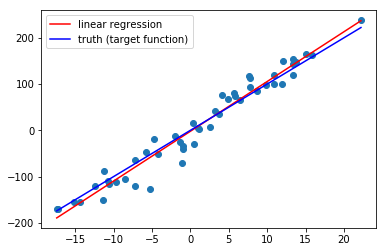

slope:
  true: 10  model:  10.757318016674628
intercept:
  true: 0  model:  -2.0757612058270105
R-squared:  0.9575757835316719


In [3]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
import random

# generate random data from a line adding some noise
def generate_regr(n_samples, x_mean, x_std, m, b, y_noise):
    x, y = list(), list()
    for i in range(n_samples):
        x0 = random.gauss(x_mean, x_std)
        y0 = m * x0 + b + (random.gauss(0, y_noise))
        x.append(x0)
        y.append(y0)
    return np.array([x]).transpose(), y

m, b, noise = 10, 0, 25
X, y = generate_regr(50, 0, 10, m, b, noise)

# plot dataset
pyplot.scatter(X,y)

# ----------- create a model and fit it to the data ----------
regr_model = LinearRegression()
regr_model.fit(X, y)

# regression line
xl = np.linspace(min(X), max(X), 100)
yl = regr_model.coef_[0] * xl + regr_model.intercept_

# truth or target function
yt= m * xl + b

pyplot.plot(xl, yl, '-r', label='linear regression')
pyplot.plot(xl, yt, '-b', label='truth (target function)')
pyplot.legend(loc='upper left')
pyplot.show()
pyplot.close()

print("slope:")
print("  true:", m, " model: ", regr_model.coef_[0])

print("intercept:")
print("  true:", b, " model: ", regr_model.intercept_)

print("R-squared: ", regr_model.score(X, y))


##### How does this work?

The optimization algorithm tries to find a line for which the **distance of the data points (residuals)** to this line is minimized. The way to *'punish'* this distance is called a **cost function**.

<img src=../img/2/residuals.png alt="residuals" width=450>

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)


There are different **cost funtions** to pick from 
- RSS: Residual Sum of Squares
$$  \sum_i (y_i - \hat{y}_i)^2 $$

- MAE: Mean Absolut Error
$$ \frac{1}{n} \sum_i |y_i - \hat{y}_i| $$
is the easiest to understand, because it's the average error.


- MSE: Mean Squared Error
$$ \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2 $$

- RMSE Rooted MSE
$$ \sqrt{MSE}$$
is even more popular than MSE, because RMSE is interpretable in the "y" units.

##### Estimating Coefficients

The algorithm goes through different combintions of the **coefficients ($ \beta_{0} ,  \beta_{1}  $)** and picks the one with the lowest cost.

$$ y = \beta_{0}  + \beta_{1} x $$


<IMG SRC="../img/2/coef_estimation.png" width=500 alt="estimating coefficients">

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

![gradient decent](../img/2/gradient_decent.gif)
source: [Towards Data Science](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)



**Gradient Decent** is an algorithm that is used to *go down the slope* to find the minimal cost.
When using a quadratic cost function (RSS or MSE), we can be sure there is just a single minimum.


Linear regression is called **linear**, not because we are fitting a line, but because with gradient decent we can **linearly progress** towards the minimal cost.

**R-squared**: an unit-independant meassure of model quality

$$ R^2 = 1 - \frac{\sum_i (\hat{y}_i - y_i)^2}{\sum_i (\hat{y}_i - \mu)^2}$$

$R^2 $: The coefficient of determination, pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variables.

#### 2.1.2 Multiple Linear Regression<a name="2_1_2"></a>

Multiple linear regression attempts to model the relationship between **two or more explanatory variables** and a response variable by fitting a linear equation to observed data. 

$$ y = \beta_{0}  + \beta_{1} x_{1} + \beta_{2} x_{2} + ... +  \beta_{n} x_{n} $$

By estimating coefficients, we can find out wich of the variables influence the outcome and how.


<img src="../img/2/mult_lin_regr.png" width="400" alt="Multiple Linear Regression">


Caution: Variables that have been found to be important when looked at in isolation, might not be important when examined in context.

<img src="../img/2/simpl_mult_lin_regr_comp.png" width="600">

Explanation: Newspaper and Radio advertisement are not independant, but correlated. Newspaper advertisement only seems to be effective, because of its correlation.


### 2.2 Classification<a name="2_2"></a>

- The **linear regression model** assumes that the response variable **Y is quantitative**.
- But in many situations, the response variable is instead **qualitative or categorical**
    - eye color ∈ {blue, brown, green}
	- email ∈ {ham, spam}
- Predicting **qualitative responses** is known as **classification**. 


In this unit I will introduce four **classification methods**. 
- K-Nearest Neighbour, Logistic regression, Decision Trees, Suppor Vector Machines (SVMs)

Later today you will learn about others.


#### 2.2.1 Logistic regression<a name="2_2_1"></a>
Caution!!! The term "Logistic Regression" is a misnomer. The algorithm is usually NOT used for regression, but for doing classification.


<img src="../img/2/logistic_regression.png" width=500 alt="logistic regression">

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)


We could use:
$$  p(x) = \beta_{0}  + \beta_{1} x $$

    
- Problems:
    - negative probabilities 
    - not only values between 0 and 1

- Using the **logistic function** can take care of that:
$$  p(x) = \frac{ e^{\beta_{0}  + \beta_{1} x }}{1 +  e^{\beta_{0}  + \beta_{1}x}} $$


#### 2.2.2 K-Nearest Neighbours (KNN)<a name="2_2_2"></a>
K Nearest Neighbors is a flexible approach to estimate the Optimal Classifier.
For any given X we find the k closest neighbors to X in the training data, and examine their corresponding Y.
If the majority of the Y’s are orange we predict orange otherwise guess blue.
The smaller that k is the more flexible the method will be.

<img src="../img/2/optimal_classifier.png" width="400">
A simulated data set consisting of 100 observations in each of two groups, indicated in blue and in orange. The purple dashed line represents the Bayes decision boundary. The orange background grid indicates the region in which a test observation will be assigned to the orange class, and the blue background grid indicates the region in which a test observation will be assigned to the blue class.  

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

k Nearest Neighbors is a flexible approach to estimate the Optimal Bayes Classifier.

<img src="../img/2/knn_03.png" width=400>


- For any given X we find the k closest neighbors to X in the training data, and examine their corresponding Y.
- If the majority of the Y’s are orange we predict orange otherwise guess blue.
- The smaller that k is the more flexible the method will be.



<img src="../img/2/knn_10.png" width="400">


The black curve indicates the KNN decision boundary on the data from above, using K = 10. 
The Bayes decision boundary is shown as a purple dashed line. The KNN and Bayes decision boundaries are very similar. 

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/knn_1_100.png" width="500">

The smaller that k is the more flexible the method will be.

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/knn_train_test_error.png" width="500">

- The **training error** rates keep going down as k decreases or equivalently as the flexibility increases.

- However, the **test error rate** at first decreases but then starts to increase again. 


source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/complexity_train_test_error.png" width="400">

- In general training errors will always decline.
- However, test errors will decline at first (as reductions in bias dominate) but will then increase again (as increases in variance dominate).

We must always keep this picture in mind when choosing a learning method. **More flexible/complicated is not always better!** 


source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

##### The Famous Iris Data Set
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

<A SRC="https://en.wikipedia.org/wiki/Iris_flower_data_set">wikipedia</A>

<table>
    <tr>
        <td>
            <img alt="iris_sepal_petal" src="../img/2/iris_sepal_petal.jpg"  width=100>
            <A src="http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/">blog.kaggle.com</A>
        </td>
        <td>
            <img alt="AI" src="../img/2/iris_species.jpg" width=330>
            <A src="https://www.spataru.at/iris-dataset-svm/">www.spataru.at/iris-dataset-svm</A>
        </td>
    </tr>
</table>


##### Example code
from <A SRC="https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py">scikit-learn.org</A>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .08  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#for weights in ['uniform', 'distance']:
n_neighbors = 3
weights="uniform"
for n_neighbors in [1, 5]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### Exercise: 
Change the parameters in the code above and observe how the cluster predictions are influenced:
- n_neighbors = ...
- weights = "uniform" or "distance"

<A SRC="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier"> sklearn.neighbors.KNeighborsClassifier</A>

#### 2.2.3 Decision Trees<a name="2_2_3"></a>

- Tree Based Methods involve *segmenting the predictor space* into a number of simple regions.
- Since the set of splitting rules used to segment the predictor space can be summarized in a tree.
- These types of approaches are known as **decision tree methods**. 


Tree Based Methods can be used for both
- regression
- classification


Example for a regression tree
<table>
    <tr>
        <td><img alt="baseball salary" src="../img/2/decision_tree_baseball.png" width=500></td>
        <td><img alt="baseball salary" src="../img/2/decision_tree_baseball_2.png" width=200></td>
    </tr>
</table>

In this example we try to predict the **salary** (colour coded (low: blue, green; high: yellow, red)) based on two features: 
number of **hits** and number of **years** of a player playing in the league.


source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

#### Advantages of Decision Trees
- very **easy to explain** to people. (even easier than linear regression)
- more closely mirror human decision-making than do the regression and classification approaches. 
- can be **displayed graphically**, and are easily interpreted even by a non-expert. 
- can easily **handle qualitative predictors** without the need to create dummy variables. 

#### Disadvantages of Decision Trees
- Unfortunately, trees generally have **low level of predictive accuracy** compared to other regression and classification approaches. 
- Additionally, trees can be very **non-robust**. A small change in the data can cause a large change in the final estimated tree.

However, by **aggregating many decision trees**, using methods like **bagging, random forests, and boosting**, the predictive performance of trees can be substantially improved. (next unit)

If you want to implement and display decision trees in python here is a very nice example: [sklearn decision trees](https://scikit-learn.org/stable/modules/tree.html)



#### 2.2.4 Suppor Vector Machines (SVMs)<a name="2_2_4"></a>


For the separation of two classes we try to find a **hyperplane** that separates them.

##### What is a hyperplane?
In a p-dimensional space, a hyperplane is a flat affine subspace of dimension p − 1.
- In two dimensions, a hyperplane is a line. 
- In three dimensions, a hyperplane is a plane.
- In p > 3 dimensions, it can be hard to visualize a hyperplane, but the notion of a (p − 1)-dimensional flat subspace still applies. 


<img alt="svm_f9_2" src="../img/2/svm_f9_2.png" width=600>



##### The Maximal Margin Classifier

<table>
    <tr>
        <td width=500>
            <img alt="svm_f9_3" src="../img/2/svm_f9_3.png" width=400>
        <td style="text-align:left; font-size:30">
The maximal margin hyperplane is the separating hyperplane for which the margin is largest.<br><br>
We can then classify a test observation based on which side of the maximal margin hyperplane it lies. This is known as the maximal margin classifier.<br><br>
We hope that a classifier that has a large margin on the training data will also have a large margin on the test data, and hence will classify the test observations correctly. <br><br>
            source: <A src="http://www-bcf.usc.edu/~gareth/ISL/">ISLR</A>
        </td>
    </tr>
</table>


##### Support Vector Classifier

<table>
    <tr>
        <td width=600>
            <img alt="svm_f9_5" src="../img/2/svm_f9_5.png" width=400>
        <td style="text-align:left; font-size:30">
            An additional blue observation has been added, leading to a dramatic shift in the maximal margin hyperplane shown as a solid line. <br><br>
            We can use a <strong>support vector classifier</strong>, sometimes called a <strong>soft margin classifier</strong> for <br><br>greater robustness to individual observations, and <br>
            better classification of most of the training observations. 
            source: <A src="http://www-bcf.usc.edu/~gareth/ISL/">ISLR</A>
        </td>
    </tr>
</table>


##### C is a tuning parameter
<table>
    <tr>
        <td width=500>
            <img alt="svm_f9_7" src="../img/2/svm_f9_7.png" width=450>        </td>
        <td style="text-align:left; font-size:30">
            A support vector classifier was fit using four different values of the tuning parameter C.<br><br>             
            The largest value of C was used in the top left panel.<br><br>              
            When C is large, then there is a high tolerance for observations being on the wrong side of the margin, and so the margin will be large. <br><br>            
            As C decreases, the tolerance for observations being on the wrong side of the margin decreases, and the margin narrows. <br> <br> 
            source: <A src="http://www-bcf.usc.edu/~gareth/ISL/">ISLR</A>
        </td>
    </tr>
</table>


[scikit-learn SVMs](https://scikit-learn.org/stable/modules/svm.html)

### 2.3 Exercise<a name="2_3"></a>
1. Play with the parameters in the linear regression code. Change parameters in these two lines:
    ~~~
    m, b, noise = 10, 0, 25
    X, y = generate_regr(50, 0, 10, m, b, noise)
    ~~~
    - What happens if you increase the number of samples?
    - What happens if you add more noise?


2. Think about a use case for machine learning in your department or domain:
    - What question do I want to answer? Typically something you do manually at the moment, or is handeled ineffectively.
    - What data set can I use to address the question?
    - Is this question really approachable by ML?
    - Is is unsupervised, supervised (regression, classification) ML?
    - What kind of algorithm would I suggest? (SVM, linear regression, clustering)?

### 2.4 Learning Material <a name="2_4"></a>
- Data School Course (Kevin Markham): **Introduction to machine learning with scikit-learn** [Jupyter notebook 6](https://github.com/justmarkham/scikit-learn-videos) and [YouTube videos](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)
- Stanford University professors Trevor Hastie and Rob Tibshirani online course based on their textbook [free PDF](http://www-bcf.usc.edu/~gareth/ISL/), **An Introduction to Statistical Learning with Applications in R (ISLR)**. [ISLR course](https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/)

- MIT course on **Introduction to Computational Thinking and Data Science** ([lectures 9 and 10](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-videos/))
